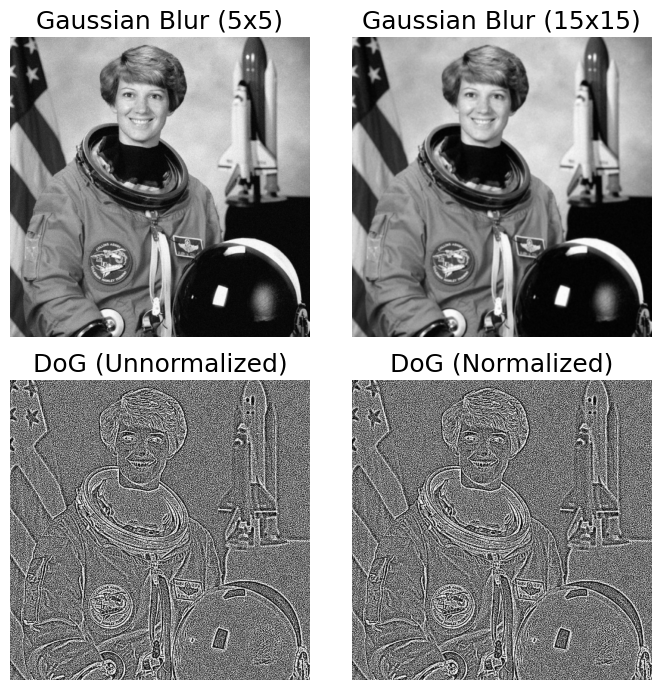

In [ ]:
import cv2, numpy as np, matplotlib.pyplot as plt

# 이미지 불러오기 (흑백 이미지로 변환)
image = cv2.imread('example.jpg', cv2.IMREAD_GRAYSCALE)

# 두 개의 다른 표준 편차를 가진 가우시안 블러를 적용
blurred_image_1 = cv2.GaussianBlur(image, (5, 5), 0)    # 표준편차가 작은 가우시안
blurred_image_2 = cv2.GaussianBlur(image, (15, 15), 0)  # 표준편차가 큰 가우시안

# 두 이미지를 빼서 DoG (Difference of Gaussian) 구하기
dog = blurred_image_1 - blurred_image_2

# NumPy를 사용한 DoG 정규화 (0 ~ 255 범위로 스케일링)
dog_normalized = (dog - dog.min()) / (dog.max() - dog.min()) * 255
dog_normalized = dog_normalized.astype(np.uint8)  # 정수형 변환

# 폰트 사이즈
fs = 18

# 결과 출력
plt.figure(figsize=(7, 7))

# 첫 번째 행: Gaussian Blur 이미지들
plt.subplot(2, 2, 1)
plt.title("Gaussian Blur (5x5)", fontsize=fs)
plt.imshow(blurred_image_1, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title("Gaussian Blur (15x15)", fontsize=fs)
plt.imshow(blurred_image_2, cmap='gray')
plt.axis('off')

# 두 번째 행: DoG 이미지들
plt.subplot(2, 2, 3)
plt.title("DoG (Unnormalized)", fontsize=fs)
plt.imshow(dog, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title("DoG (Normalized)", fontsize=fs)
plt.imshow(dog_normalized, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()